# Corpus EDA

In [4]:
# Import the required libraries
import pandas as pd
import numpy as np

import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

from myFunctions import process_tweet_text_encode_to_ascii
from myFunctions import get_social_media_stopwords_list
from myFunctions import plot_word_cloud
from myFunctions import clean_tweet, tokenize_tweet, tokenize_lemmatize_tweet

In [6]:
# read in the processed data
pos_tweets = pd.read_csv('../data/cleaned_tweets_positive.csv', encoding = 'unicode_escape')

neg_tweets = pd.read_csv('../data/cleaned_tweets_negative.csv', encoding = 'unicode_escape')

neutral_tweets = pd.read_csv('../data/cleaned_tweets_neutral.csv', encoding = 'unicode_escape')

all_tweets = pd.read_csv('../data/cleaned_tweets_all.csv')

## Most Common Words
What are the most common words found in Positive, Negative and Neutral Tweets?

In [7]:
# Create word clouds of the most common words in Positive, Negative (and Neutral) Tweets
# Note: no lemma done here
positive_tweet_words = list()
for tweet in pos_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        positive_tweet_words.append(word)

negative_tweet_words = list()
for tweet in neg_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        negative_tweet_words.append(word)

neutral_tweet_words = list()
for tweet in neutral_tweets['tweet_text'].to_list():
    processed_tweet = process_tweet_text_encode_to_ascii(tweet, get_social_media_stopwords_list())
    for word in processed_tweet:
        neutral_tweet_words.append(word)


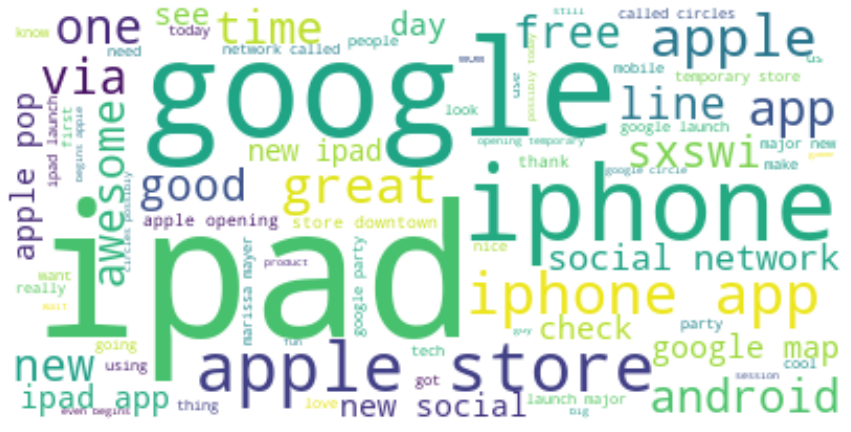

In [8]:
# Postive Tweets top 50 words
positive_text = ' '.join(word for word in positive_tweet_words)
plot_word_cloud(positive_text, 75, get_social_media_stopwords_list(), 'white')

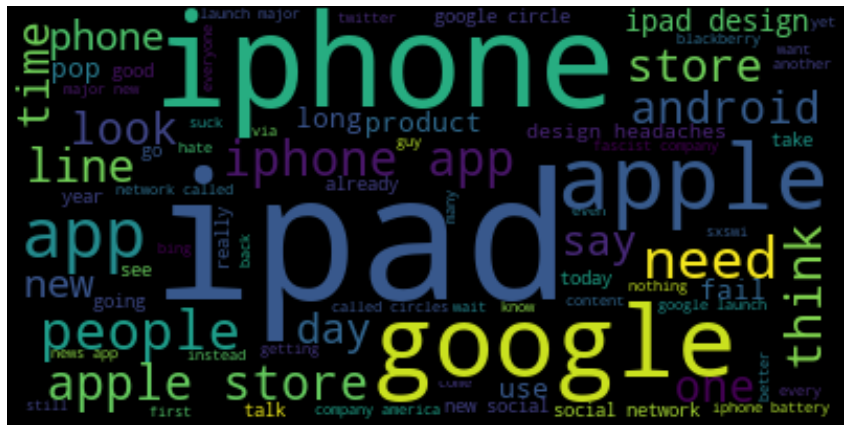

In [9]:
# Negative Tweets top 50 words
negative_text = ' '.join(word for word in negative_tweet_words)
plot_word_cloud(negative_text, 75, get_social_media_stopwords_list())

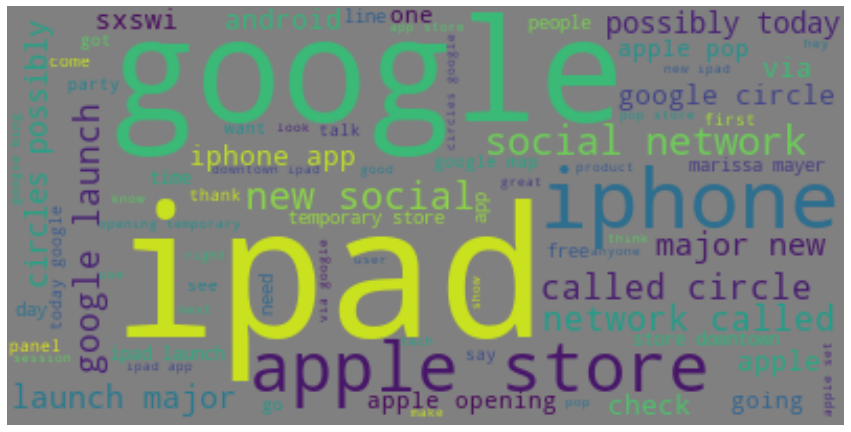

In [10]:
# Neutral Tweets top 50 words
neutral_text = ' '.join(word for word in neutral_tweet_words)
plot_word_cloud(neutral_text, 75, get_social_media_stopwords_list(), 'grey')

### Insights/Recommendations:
* TODO add them

## Is there a difference in character count between Postitive/Negative/Neutral Tweets?
### Histogram of char count for each sentiment class

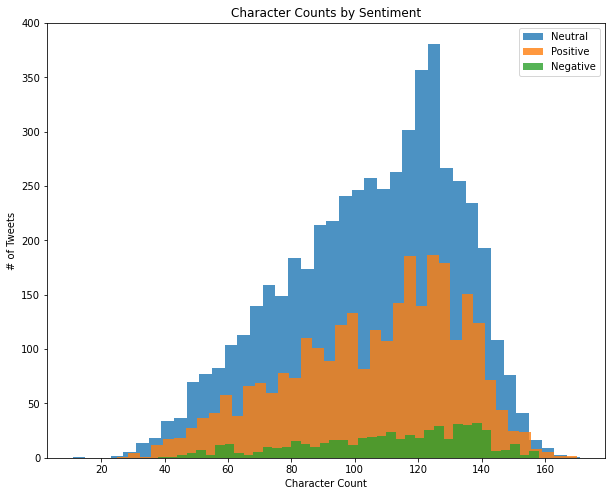

In [3]:
# Show the distribution of tweet character count for each of the sentiment classes
plfig = plt.figure(figsize = (10, 8))
plt.hist(neutral_tweets['tweet_char_count'], bins=40, alpha=0.8)
plt.hist(pos_tweets['tweet_char_count'], bins=40,alpha=0.8)
plt.hist(neg_tweets['tweet_char_count'], bins=40, alpha=0.8)
plt.legend(('Neutral', 'Positive', 'Negative'))
plt.grid=False
plt.xlabel('Character Count')
plt.ylabel('# of Tweets')
plt.title('Character Counts by Sentiment')
plt.show()

### Insights/Recommendations:
* Character Count won't be a good feature for Classification. There is a lot of overlap between all three Sentiment classes. 

## Future Work
* Explore if punctuation would be a good feature for text classification.
* ?